In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
from functools import reduce
from PyEMD import EMD, Visualisation
%matplotlib inline

我一直没有弄明白为什么信号调制在时域上时两个信号相乘而不是相加，当前情况下我只能直接接收这个相乘的方式，这个结论肯定是对的，只是我自己没有想通而已。
三角函数里面有这么一个概念$$sinxsiny = \dfrac{1}{2}[cos(x-y)-cos(x+y)]$$， 或许从这个公式看来相乘和相加的关系就被体现出来了。
$$
\displaylines {
A=\sqrt{(A_1cos \varphi_1+A_2cos \varphi_2)^2 + (A_1sin \varphi_1+A_2sin \varphi_2) ^ 2} \\
tan \ \varphi = \dfrac{A_1sin \varphi_1+A_2sin \varphi_2}{A_1cos\varphi_1 + A_2cos\varphi_2}
}
$$

$$
\begin{cases}
\int _ 0 ^ T cos\  m \omega t\  cos\ n \omega t \ dt = \begin{cases} 0, m \ne n\\ T/2, m = n \end{cases} \\
\int _ 0 ^ T sin\ m \omega t \ sin\ n \omega t\ dt = \begin{cases} 0, m \ne n \\ 
T/2, m=n \end{cases} \\
\int _ 0 ^ T sin\ m \omega t \ cos\ n \omega t\ dt = \int _0 ^ T cos \ m \omega t \ sin\ n \omega t \ dt \\
\end{cases}
$$

In [85]:
def modulate(x, signals):
    y = reduce(lambda t1, t2: t1 + t2, signals)
    plt.figure(figsize=(32,6))
    plt.plot(x, y)
    plt.show()
    return y

def show_fft(x, y, b, rate):
    fy = np.fft.rfft(y)
    freq = np.fft.rfftfreq(len(x), rate)
    plt.figure(figsize=(32,6))
    plt.plot(freq[:b], np.abs(fy[:b]))
    plt.show()

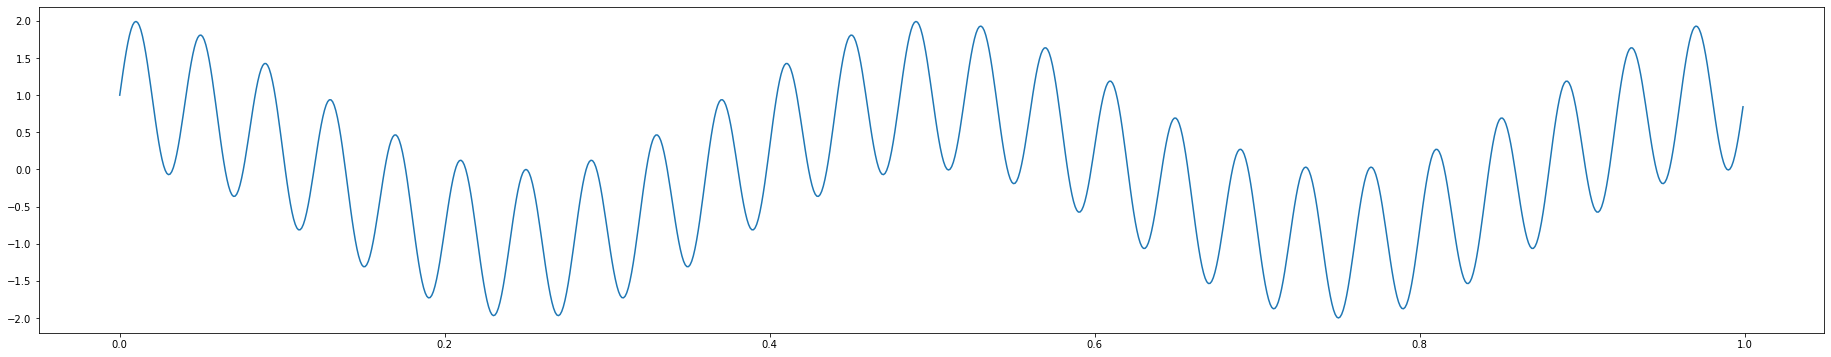

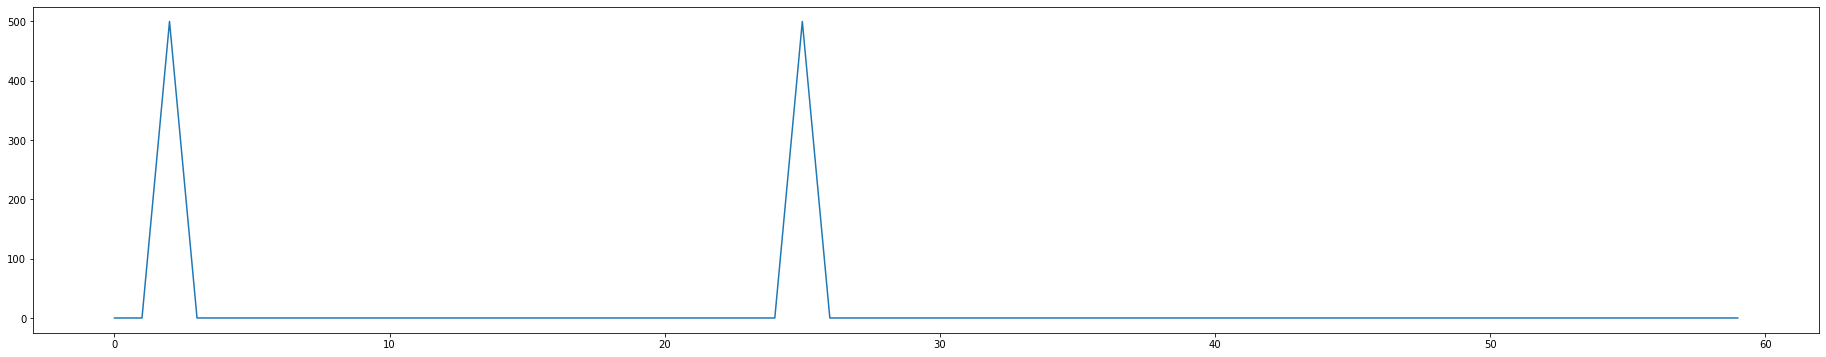

In [87]:
rate = 1.0/1000
x = np.arange(0,1, rate)
y1 = 1 * np.cos(2 * x * 2 * np.pi)
y2 = 1 * np.sin(25 * x * 2 * np.pi)
y = modulate(x, [y1, y2])
show_fft(x, y, 60, rate)

# 包络信号基础
我到现在都没有搞清楚包络到底是什么东西，可以用来干啥，以及为何希尔伯特变换可以求取包络
下面是学习过程中的记录

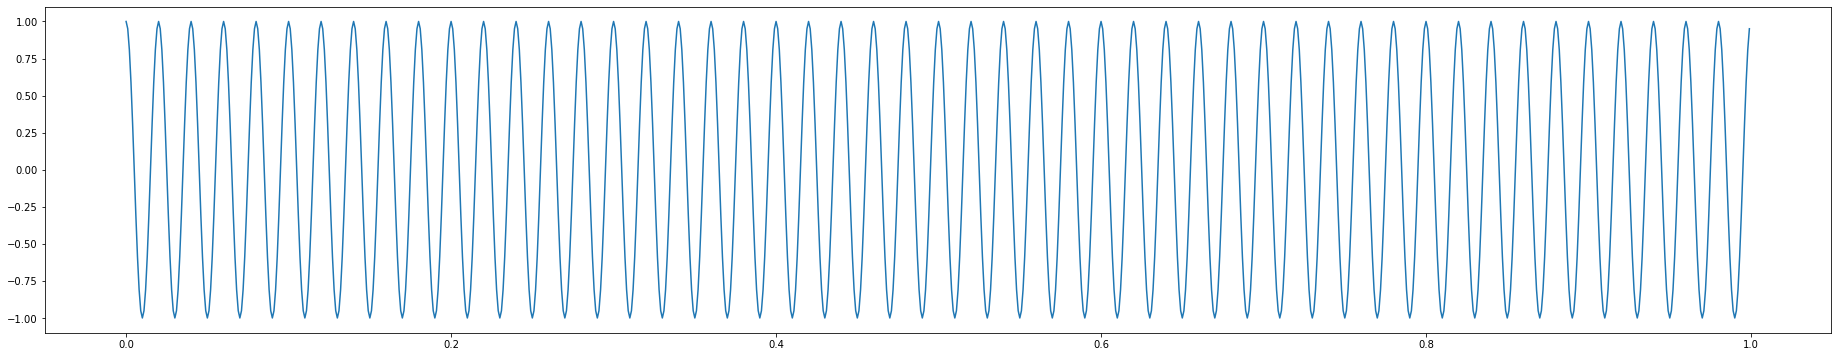

C:\Users\DELL\anaconda3\envs\dl\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


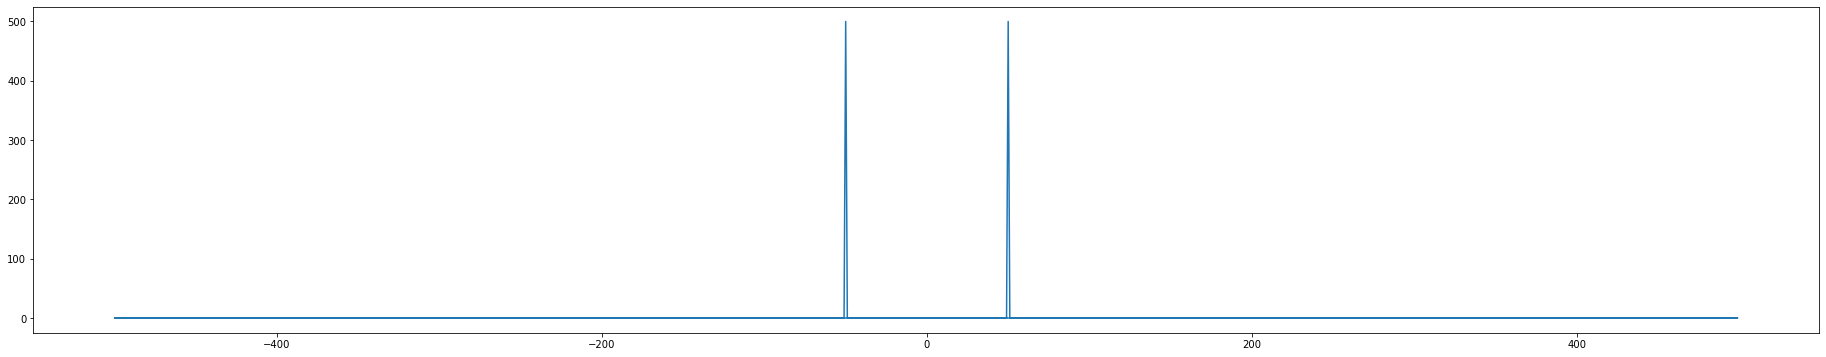

[-3.60829288e-14+1.29111739e-13j  3.79141163e-13-9.93219678e-14j
  4.93851045e-14+7.94973324e-14j  1.20101496e-13+3.30045129e-13j]
[-7.34013831e-14+2.57517794e-13j  7.60280727e-13-1.94987217e-13j
  9.76362467e-14+1.57611017e-13j  2.39671112e-13+6.64346995e-13j]


C:\Users\DELL\anaconda3\envs\dl\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


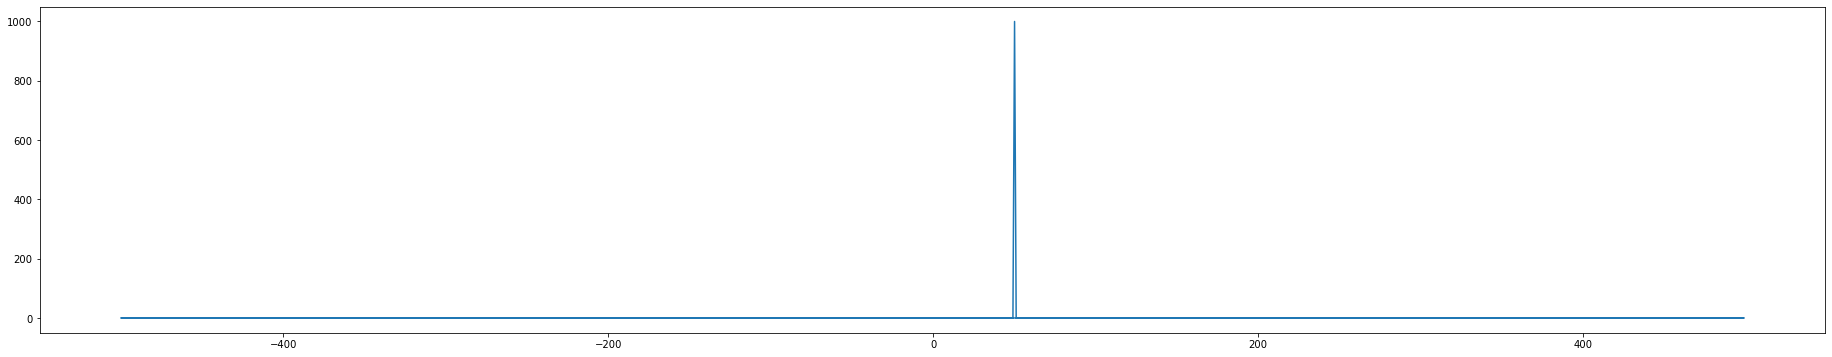

In [51]:
rate=1*1000
x = np.arange(0,1, 1.0/rate)
y = np.cos(2 * np.pi * 50 * x)
plt.figure(figsize=(32,6))
plt.plot(x, y)
plt.show()
env = sp.signal.hilbert(y)

fft_y = np.fft.fft(y)

fft_env = np.fft.fft(env)
freq = np.fft.fftfreq(len(y), 1.0/rate)
plt.figure(figsize=(32,6))
plt.plot(freq, fft_y)
plt.show()
plt.figure(figsize=(32,6))
plt.plot(freq, fft_env)
print(fft_y[1:5])
print(fft_env[1:5])